# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 텐서플로의 선형 회귀 방식

In [3]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 직업 크기 및 플레이스홀더, 모델 변수 선언
batch_size = 25
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 선형 모델 선언
model_output = tf.add(tf.matmul(x_data,A), b)

# L2 비용 함수 선언
loss = tf.reduce_mean(tf.square(y_target - model_output))

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 모델 학습
loss_vec = []

for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss) + '\n')

Step #25 A = [[2.3495705]] b = [[2.5429265]]
Loss = 1.5869102

Step #50 A = [[1.7485363]] b = [[3.5231292]]
Loss = 0.5381671

Step #75 A = [[1.3854425]] b = [[4.0068617]]
Loss = 0.24075623

Step #100 A = [[1.187927]] b = [[4.308253]]
Loss = 0.22523712



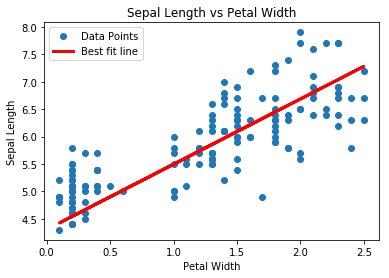

In [4]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

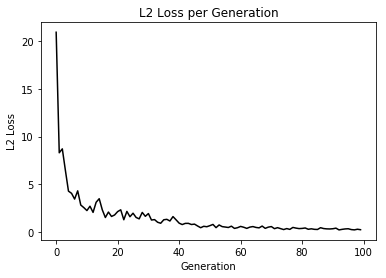

In [5]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

> 찾아낸 직선이 가장 적합한 직선이라는 보장이 없다. 
> 최적 직선 수렴 상태는 학습 반복 획수, 일괄 작업 크기, 학습률, 비용 함수에 영향을 받는다. 
> 문제 해결 및 초매개변수 조정에 도움이 될 수 있기 때문에 지속적으로 비용 함수 값을 관찰하는 것이 좋다.

### 선형 회귀의 비용 함수

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

batch_size = 25
learning_rate = 0.1
iterations = 50

x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
def fun(x_vals, y_vals, x_data, y_target, loss, batch_size, learning_rate):
    my_opt = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = my_opt.minimize(loss)

    init = tf.global_variables_initializer()
    sess.run(init)

    loss_vec = []

    for i in range(iterations):
        rand_index = np.random.choice(len(x_vals), size=batch_size)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
    
        sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        loss_vec.append(temp_loss)
    
        if (i+1) % 25 == 0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
            
    return loss_vec

In [8]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))
loss_vec_l1 = []
loss_vec_l1 = fun(x_vals, y_vals, x_data, y_target, loss_l1, batch_size, learning_rate)

Step #25 A = [[1.3931714]]b = [[3.981099]]
Step #50 A = [[1.0583715]]b = [[4.4570985]]


In [9]:
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))
loss_vec_l2 = []
loss_vec_l2 = fun(x_vals, y_vals, x_data, y_target, loss_l2, batch_size, learning_rate)

Step #25 A = [[1.2915591]]b = [[3.9716141]]
Step #50 A = [[1.1015257]]b = [[4.5395947]]


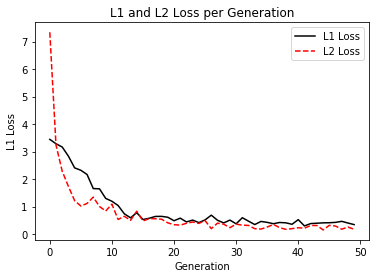

In [10]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

In [11]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))
loss_vec_l1 = []
loss_vec_l1 = fun(x_vals, y_vals, x_data, y_target, loss_l1, batch_size, 0.4)

Step #25 A = [[0.6734452]]b = [[4.4999294]]
Step #50 A = [[0.87024504]]b = [[4.67593]]


In [12]:
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))
loss_vec_l2 = []
loss_vec_l2 = fun(x_vals, y_vals, x_data, y_target, loss_l2, batch_size, 0.4)

Step #25 A = [[89.4386]]b = [[68.227516]]
Step #50 A = [[-191.51497]]b = [[-146.15933]]


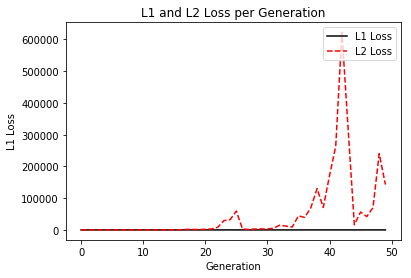

In [13]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

> 학습률이 너무 커질 경우 여전히 수렴하는 L1 노름값과 달리 L2 노름 값은 튀어 오르는 것을 볼 수 있다.